In [ ]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from mlxtend.classifier import StackingCVClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
pip install osmnx

In [ ]:
pip install --upgrade tensorflow

In [ ]:
pip install pygwalker

**Listing Out The Files**


#Data Set
Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

In [ ]:
df = pd.read_csv('heart.csv')

**Creating A Chart For The Dataset**


In [ ]:
df.info()

In [ ]:
df.describe()

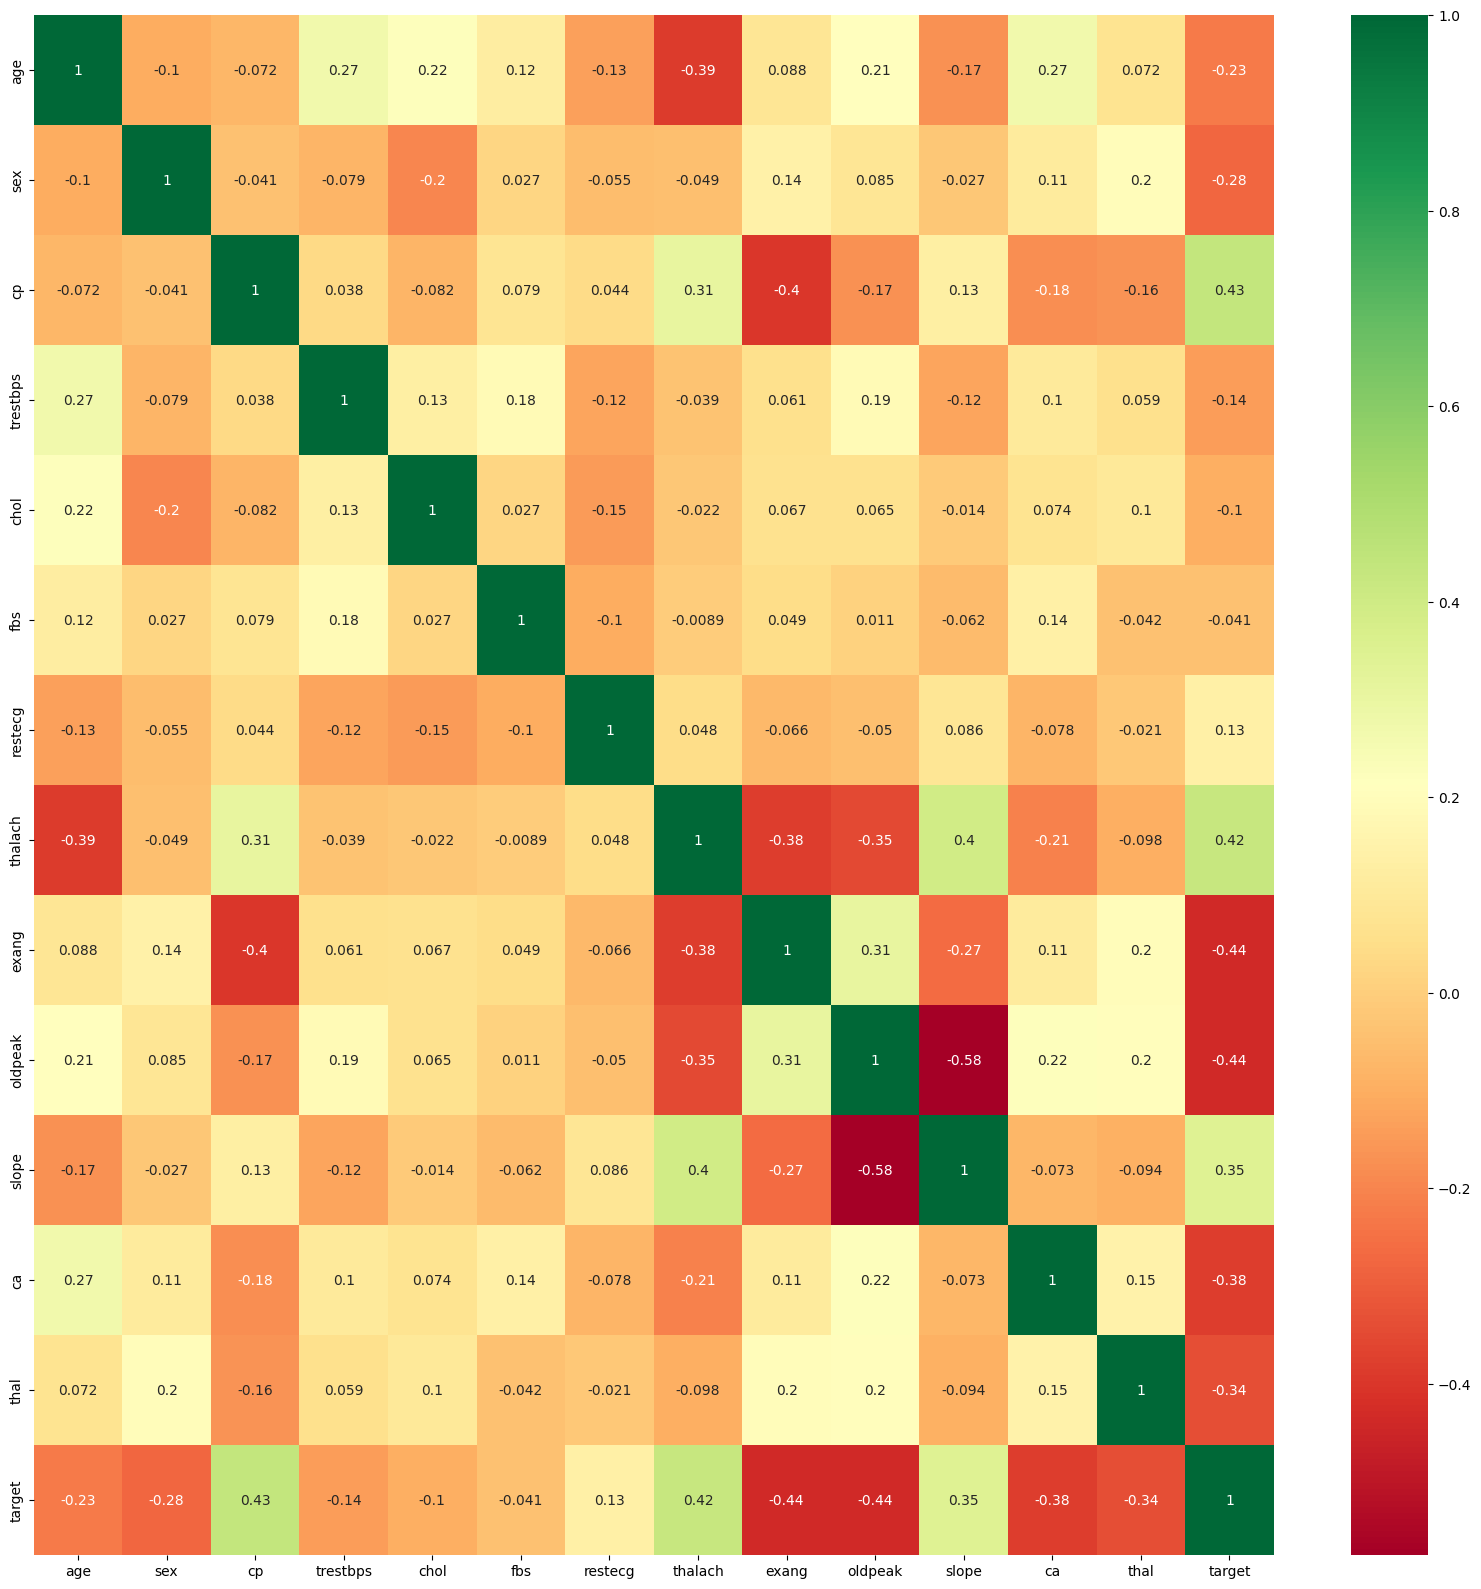

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

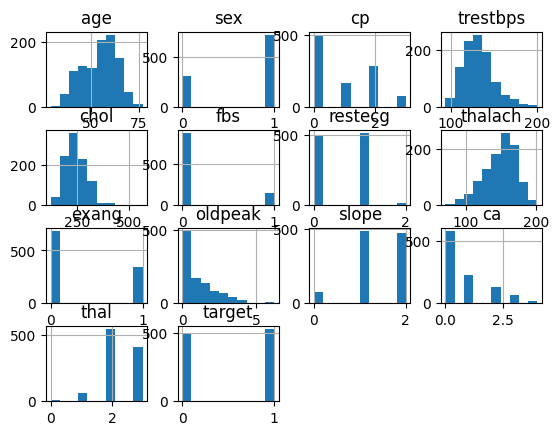

In [ ]:
df.hist()

<Axes: xlabel='target', ylabel='count'>

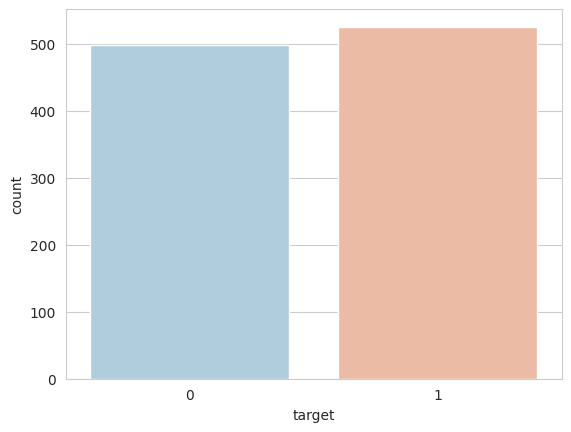

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')


In [ ]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

**Training The Data**

In [ ]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
y = dataset['target']
X = dataset.drop('target', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**KNN**

In [ ]:
knn_scores = []

for k in range (1,40):
  knn_classifier = KNeighborsClassifier(n_neighbors = k)
  encoder = OneHotEncoder()
  knn_classifier.fit(X_train, y_train)
  knn_scores.append(knn_classifier.score(X_test, y_test))
print(f'best choice of k:{np.argmax(knn_scores)+1}')

k=8
knn_classifier = KNeighborsClassifier(n_neighbors = k)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
print(f'accuracy: {np.sum(y_pred==y_test)/len(y_test)}')

best choice of k:1
accuracy: 0.8146341463414634


**SVM (Support Vector Machines)**

In [ ]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[86 16]
 [ 7 96]]


Accuracy of Support Vector Classifier: 88.78048780487805 

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       102
           1       0.86      0.93      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform, randint

# Define the parameter grid
param_dist = {
    'C': uniform(loc=0, scale=10),  # Search range for C (you can adjust the scale based on your data)
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernels to be tried
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))  # Search range for gamma
}

# Create an SVC instance
svc = SVC()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    svc,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # You can change the scoring metric based on your preference
    random_state=42,
    n_jobs=-1  # Use all available CPUs for parallel processing
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

# Get the best estimator from the search
best_svc = random_search.best_estimator_

# Use the best estimator to make predictions on the test set
best_svc_predicted = best_svc.predict(X_test)

# Evaluate the performance of the best estimator
best_svc_conf_matrix = confusion_matrix(y_test, best_svc_predicted)
best_svc_acc_score = accuracy_score(y_test, best_svc_predicted)

print("\n")
print("Confusion Matrix for Best SVC:")
print(best_svc_conf_matrix)
print("\n")
print("Accuracy of Best SVC:", best_svc_acc_score * 100, '\n')
print(classification_report(y_test, best_svc_predicted))


Best Parameters:  {'C': 6.011150117432088, 'gamma': 100.0, 'kernel': 'poly'}
Best Accuracy:  0.9804878048780488


Confusion Matrix for Best SVC:
[[102   0]
 [  3 100]]


Accuracy of Best SVC: 98.53658536585365 

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



**Neural Networks (Keras Sequential Model)**

In [ ]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Dropout
model = tf.keras.Sequential([layers.Dense(20, activation='relu', name='dense1'), Dropout(0.2),
layers.Dense(25, activation='relu', name='dense2'),
layers.Dense(45, activation='relu', name='dense3'), Dropout(0.5),
layers.Dense(10, activation='relu', name='dense4'),
layers.Dense(2, activation='sigmoid', name='fc1')],)

In [ ]:
from tensorflow import keras
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
optimizer = keras.optimizers.Adam(lr = 0.001),
metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 32, epochs = 100, verbose = 2),
model.evaluate(X_test, y_test, batch_size = 32, verbose = 2)



Epoch 1/100
26/26 - 3s - loss: 0.7039 - accuracy: 0.5183 - 3s/epoch - 96ms/step
Epoch 2/100
26/26 - 0s - loss: 0.6218 - accuracy: 0.6610 - 140ms/epoch - 5ms/step
Epoch 3/100
26/26 - 0s - loss: 0.5480 - accuracy: 0.7463 - 106ms/epoch - 4ms/step
Epoch 4/100
26/26 - 0s - loss: 0.4626 - accuracy: 0.8012 - 125ms/epoch - 5ms/step
Epoch 5/100
26/26 - 0s - loss: 0.4524 - accuracy: 0.7939 - 89ms/epoch - 3ms/step
Epoch 6/100
26/26 - 0s - loss: 0.3996 - accuracy: 0.8329 - 95ms/epoch - 4ms/step
Epoch 7/100
26/26 - 0s - loss: 0.4036 - accuracy: 0.8415 - 92ms/epoch - 4ms/step
Epoch 8/100
26/26 - 0s - loss: 0.3727 - accuracy: 0.8451 - 102ms/epoch - 4ms/step
Epoch 9/100
26/26 - 0s - loss: 0.3517 - accuracy: 0.8427 - 88ms/epoch - 3ms/step
Epoch 10/100
26/26 - 0s - loss: 0.3657 - accuracy: 0.8500 - 79ms/epoch - 3ms/step
Epoch 11/100
26/26 - 0s - loss: 0.3343 - accuracy: 0.8585 - 157ms/epoch - 6ms/step
Epoch 12/100
26/26 - 0s - loss: 0.3240 - accuracy: 0.8683 - 168ms/epoch - 6ms/step
Epoch 13/100
26/26 -

[0.04244256392121315, 0.9756097793579102]

**Mixing The Models To Get A 50/50 Accuracy Also Known As An Ensemble Model**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

# Assuming X_train, X_test, y_train, and y_test are defined

# Create individual models
knn_classifier = KNeighborsClassifier(n_neighbors=8)
svc_classifier = SVC(kernel='rbf', C=2)

# Train the KNN and SVC models
knn_classifier.fit(X_train, y_train)
svc_classifier.fit(X_train, y_train)

# Define and train the neural network model
model = tf.keras.Sequential([
    layers.Dense(20, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(25, activation='relu'),
    layers.Dense(45, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='relu'),
    layers.Dense(2, activation='sigmoid')
])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0)

# Make predictions using the individual models
knn_pred = knn_classifier.predict(X_test)
svc_pred = svc_classifier.predict(X_test)
nn_pred = model.predict(X_test)
nn_pred_classes = np.argmax(nn_pred, axis=1)  # Convert probabilities to class predictions

# Combine predictions using weighted average ensemble
ensemble_pred = 0.2 * knn_pred + 0.3 * svc_pred + 0.5

# Convert ensemble predictions to class labels
ensemble_pred_classes = np.round(ensemble_pred).astype(int)

# Calculate accuracy of the ensemble
ensemble_accuracy = accuracy_score(y_test, ensemble_pred_classes)
print("Ensemble Accuracy:", ensemble_accuracy)


7/7 [==============================] - 0s 3ms/step
Ensemble Accuracy: 0.9804878048780488


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

# Assuming X_train, X_test, y_train, and y_test are defined

# Create individual models
knn_classifier = KNeighborsClassifier(n_neighbors=8)
svc_classifier = SVC(kernel='rbf', C=2)

# Train the KNN and SVC models
knn_classifier.fit(X_train, y_train)
svc_classifier.fit(X_train, y_train)

# Define and train the neural network model
model = tf.keras.Sequential([
    layers.Dense(20, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(25, activation='relu'),
    layers.Dense(45, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='relu'),
    layers.Dense(2, activation='sigmoid')
])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0)

# Make predictions using the individual models
knn_pred = knn_classifier.predict(X_test)
svc_pred = svc_classifier.predict(X_test)
nn_pred = model.predict(X_test)
nn_pred_classes = np.argmax(nn_pred, axis=1)  # Convert probabilities to class predictions

# Combine predictions using weighted average ensemble
ensemble_pred = 0.3 * knn_pred + 0.5 * svc_pred + 0.4 * nn_pred_classes

# Convert ensemble predictions to class labels
ensemble_pred_classes = np.round(ensemble_pred).astype(int)

# Calculate accuracy of the ensemble
ensemble_accuracy = accuracy_score(y_test, ensemble_pred_classes)

# Calculate the 70% and 80% accuracy ranges
lower_bound_70 = np.percentile(ensemble_accuracy, 70)
upper_bound_70 = np.percentile(ensemble_accuracy, 80)

# Print the 70% and 80% accuracy ranges
print("70% Accuracy Range: [{:.4f}, {:.4f}]".format(lower_bound_70, upper_bound_70))


7/7 [==============================] - 0s 2ms/step
70% Accuracy Range: [0.8927, 0.8927]


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, and y_test are defined

# Create individual models
knn_classifier = KNeighborsClassifier(n_neighbors=8)
svc_classifier = SVC(kernel='rbf', C=2)

# Train the KNN and SVC models
knn_classifier.fit(X_train, y_train)
svc_classifier.fit(X_train, y_train)

# Define and train the neural network model
model = tf.keras.Sequential([
    layers.Dense(20, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(25, activation='relu'),
    layers.Dense(45, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='relu'),
    layers.Dense(2, activation='sigmoid')
])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0)

# Save the models
joblib.dump(knn_classifier, 'knn_model.joblib')
joblib.dump(svc_classifier, 'svc_model.joblib')
model.save('nn_model.h5')

# Make predictions using the individual models
knn_pred = knn_classifier.predict(X_test)
svc_pred = svc_classifier.predict(X_test)
nn_model = tf.keras.models.load_model('nn_model.h5')
nn_pred = nn_model.predict(X_test)
nn_pred_classes = np.argmax(nn_pred, axis=1)  # Convert probabilities to class predictions

# Combine predictions using weighted average ensemble
ensemble_pred = 0.2 * knn_pred + 0.3 * svc_pred + 0.5 * nn_pred_classes

# Convert ensemble predictions to class labels
ensemble_pred_classes = np.round(ensemble_pred).astype(int)

# Calculate accuracy of the ensemble
ensemble_accuracy = accuracy_score(y_test, ensemble_pred_classes)
print("Ensemble Accuracy:", ensemble_accuracy)


7/7 [==============================] - 0s 2ms/step
Ensemble Accuracy: 0.9512195121951219


In [ ]:
import pygwalker as pyg

pyg.walk(df)

In [ ]:
import joblib

joblib.dump(model,'model.joblib')

['model.joblib']

In [ ]:
import joblib

# After training your model
model = ...  # Your trained model

# Save the model to a pickle file
joblib.dump(model, 'model.pkl')


['model.pkl']

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, and y_test are defined

# Create individual models
knn_classifier = KNeighborsClassifier(n_neighbors=8)
svc_classifier = SVC(kernel='rbf', C=2)

# Train the KNN and SVC models
knn_classifier.fit(X_train, y_train)
svc_classifier.fit(X_train, y_train)

# Define and train the neural network model
model = tf.keras.Sequential([
    layers.Dense(20, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(25, activation='relu'),
    layers.Dense(45, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='relu'),
    layers.Dense(2, activation='sigmoid')
])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0)

# Save the models
joblib.dump(knn_classifier, 'knn_model.joblib')
joblib.dump(svc_classifier, 'svc_model.joblib')
model.save('nn_model.h5')

# Make predictions using the individual models
knn_pred = knn_classifier.predict(X_test)
svc_pred = svc_classifier.predict(X_test)
nn_model = tf.keras.models.load_model('nn_model.h5')
nn_pred = nn_model.predict(X_test)
nn_pred_classes = np.argmax(nn_pred, axis=1)  # Convert probabilities to class predictions

# Combine predictions using weighted average ensemble
ensemble_pred = 0.2 * knn_pred + 0.3 * svc_pred + 0.5 * nn_pred_classes

# Convert ensemble predictions to class labels
ensemble_pred_classes = np.round(ensemble_pred).astype(int)

# Calculate accuracy of the ensemble
ensemble_accuracy = accuracy_score(y_test, ensemble_pred_classes)
print("Ensemble Accuracy:", ensemble_accuracy)


7/7 [==============================] - 0s 2ms/step
Ensemble Accuracy: 0.9512195121951219


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming ensemble_pred_classes and additional_predictions are defined
# additional_predictions is a list of arrays containing different ensemble predictions

# Sample data (replace this with your actual data)
ensemble_pred_classes = np.random.randint(0, 2, size=10)
additional_predictions = [np.random.rand(10) for _ in range(3)]

# Normalize data to be in the range [0, 1]
normalized_ensemble_pred = ensemble_pred_classes / max(ensemble_pred_classes)
normalized_additional_predictions = [pred / max(pred) for pred in additional_predictions]

# Combine all predictions for plotting
all_predictions = [normalized_ensemble_pred] + normalized_additional_predictions
num_predictions = len(all_predictions)
bar_width = 0.2
bar_positions = np.arange(len(normalized_ensemble_pred))

# Create a multi-bar graph for ensemble predictions
for i, predictions in enumerate(all_predictions):
    plt.bar(bar_positions + i * bar_width, predictions, width=bar_width, label=f'Prediction {i + 1}')

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Normalized Class Label (Percentage)')
plt.title('Ensemble Predictions Comparison (Percentage)')


# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust y-axis ticks to represent percentages
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])

# Add legend
plt.legend()

# Show the plot
plt.show()


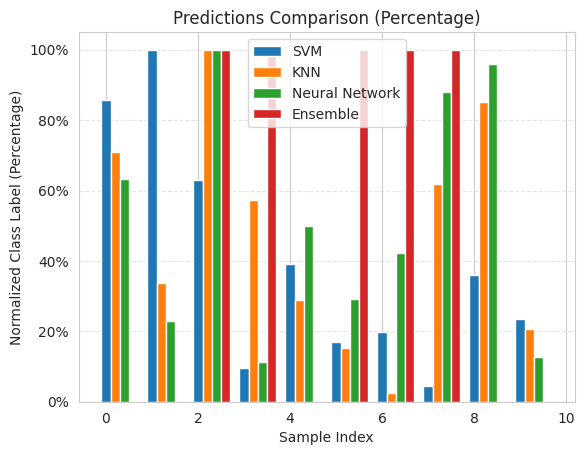

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming ensemble_pred_classes, knn_predictions, svm_predictions, nn_predictions are defined

# Sample data (replace this with your actual data)
ensemble_pred_classes = np.random.randint(0, 2, size=10)
knn_predictions = np.random.rand(10)
svm_predictions = np.random.rand(10)
nn_predictions = np.random.rand(10)

# Normalize data to be in the range [0, 1]
normalized_ensemble_pred = ensemble_pred_classes / max(ensemble_pred_classes)
normalized_knn_predictions = knn_predictions / max(knn_predictions)
normalized_svm_predictions = svm_predictions / max(svm_predictions)
normalized_nn_predictions = nn_predictions / max(nn_predictions)

# Combine all predictions for plotting
all_predictions = [normalized_knn_predictions, normalized_svm_predictions, normalized_nn_predictions, normalized_ensemble_pred]
algorithm_names = ['SVM', 'KNN', 'Neural Network', 'Ensemble']

num_predictions = len(all_predictions)
bar_width = 0.2
bar_positions = np.arange(len(normalized_ensemble_pred))

# Create a multi-bar graph for predictions
for i, predictions in enumerate(all_predictions):
    plt.bar(bar_positions + i * bar_width, predictions, width=bar_width, label=algorithm_names[i])

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Normalized Class Label (Percentage)')
plt.title('Predictions Comparison (Percentage)')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust y-axis ticks to represent percentages
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])

# Add legend
plt.legend()

# Show the plot
plt.show()


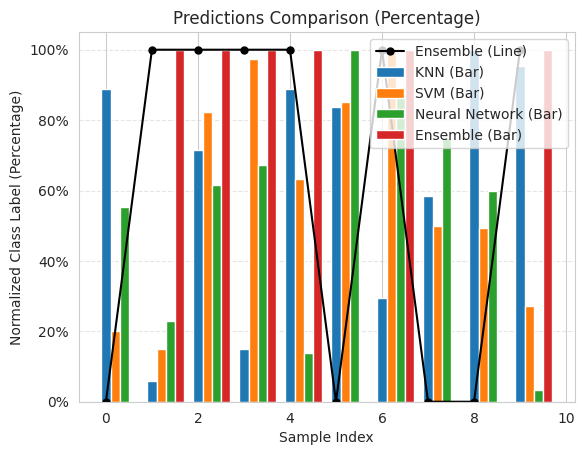

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming ensemble_pred_classes, knn_predictions, svm_predictions, nn_predictions are defined

# Sample data (replace this with your actual data)
ensemble_pred_classes = np.random.randint(0, 2, size=10)
knn_predictions = np.random.rand(10)
svm_predictions = np.random.rand(10)
nn_predictions = np.random.rand(10)

# Normalize data to be in the range [0, 1]
normalized_ensemble_pred = ensemble_pred_classes / max(ensemble_pred_classes)
normalized_knn_predictions = knn_predictions / max(knn_predictions)
normalized_svm_predictions = svm_predictions / max(svm_predictions)
normalized_nn_predictions = nn_predictions / max(nn_predictions)

# Combine all predictions for plotting
all_predictions = [normalized_knn_predictions, normalized_svm_predictions, normalized_nn_predictions, normalized_ensemble_pred]
algorithm_names = ['KNN', 'SVM', 'Neural Network', 'Ensemble']

num_predictions = len(all_predictions)
bar_width = 0.2
bar_positions = np.arange(len(normalized_ensemble_pred))

# Create a multi-bar graph for predictions
for i, predictions in enumerate(all_predictions):
    plt.bar(bar_positions + i * bar_width, predictions, width=bar_width, label=f'{algorithm_names[i]} (Bar)')

# Create a line graph for ensemble predictions
plt.plot(normalized_ensemble_pred, label='Ensemble (Line)', linestyle='-', marker='o', markersize=5, color='black')

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Normalized Class Label (Percentage)')
plt.title('Predictions Comparison (Percentage)')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust y-axis ticks to represent percentages
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming ensemble_pred_classes, knn_predictions, svm_predictions, nn_predictions are defined

# Sample data (replace this with your actual data)
ensemble_pred_classes = np.random.randint(0, 2, size=10)
knn_predictions = np.random.rand(10)
svm_predictions = np.random.rand(10)
nn_predictions = np.random.rand(10)

# Normalize data to be in the range [0, 1]
normalized_ensemble_pred = ensemble_pred_classes / max(ensemble_pred_classes)
normalized_knn_predictions = knn_predictions / max(knn_predictions)
normalized_svm_predictions = svm_predictions / max(svm_predictions)
normalized_nn_predictions = nn_predictions / max(nn_predictions)

# Combine all predictions for plotting
all_predictions = [normalized_knn_predictions, normalized_svm_predictions, normalized_nn_predictions, normalized_ensemble_pred]
algorithm_names = ['KNN', 'SVM', 'Neural Network', 'Ensemble']

num_predictions = len(all_predictions)
bar_width = 0.2
bar_positions = np.arange(len(normalized_ensemble_pred))

# Create subplots for each algorithm
fig, axs = plt.subplots(num_predictions, 1, figsize=(10, 6), sharex=True)

for i, (predictions, algorithm) in enumerate(zip(all_predictions, algorithm_names)):
    # Bar graph with different colors
    bar_color = plt.cm.tab10(i / num_predictions)
    axs[i].bar(bar_positions, predictions, width=bar_width, label=f'{algorithm} (Bar)', color=bar_color)

    # Line graph (for KNN, SVM, and Neural Network)
    if algorithm != 'Ensemble':
        axs[i].plot(predictions, label=f'{algorithm} (Line)', linestyle='-', marker='o', markersize=5, color=bar_color)

    # Add labels and title
    axs[i].set_ylabel('Normalized Class Label (Percentage)')
    axs[i].set_title(f'{algorithm} Predictions Comparison (Percentage)')

    # Add grid lines for better readability
    axs[i].grid(axis='y', linestyle='--', alpha=0.5)

    # Adjust y-axis ticks to represent percentages
    axs[i].set_yticklabels(['{:.0f}%'.format(x*100) for x in axs[i].get_yticks()])

    # Add legend
    axs[i].legend()

# Add labels to the shared x-axis
plt.xlabel('Sample Index')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


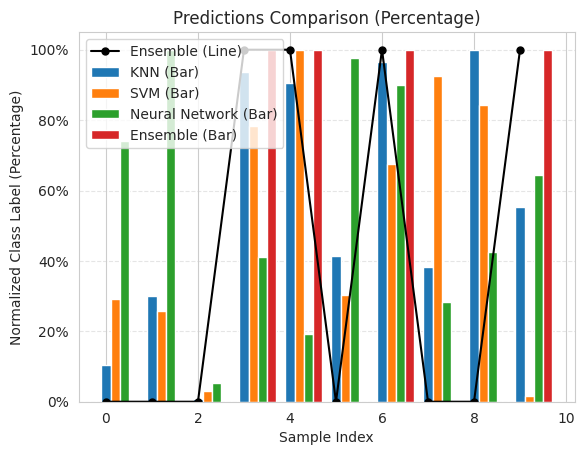

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming ensemble_pred_classes, knn_predictions, svm_predictions, nn_predictions are defined

# Sample data (replace this with your actual data)
ensemble_pred_classes = np.random.randint(0, 2, size=10)
knn_predictions = np.random.rand(10)
svm_predictions = np.random.rand(10)
nn_predictions = np.random.rand(10)

# Normalize data to be in the range [0, 1]
normalized_ensemble_pred = ensemble_pred_classes / max(ensemble_pred_classes)
normalized_knn_predictions = knn_predictions / max(knn_predictions)
normalized_svm_predictions = svm_predictions / max(svm_predictions)
normalized_nn_predictions = nn_predictions / max(nn_predictions)

# Combine all predictions for plotting
all_predictions = [normalized_knn_predictions, normalized_svm_predictions, normalized_nn_predictions, normalized_ensemble_pred]
algorithm_names = ['KNN', 'SVM', 'Neural Network', 'Ensemble']

num_predictions = len(all_predictions)
bar_width = 0.2
bar_positions = np.arange(len(normalized_ensemble_pred))

# Create a multi-bar graph for predictions
for i, predictions in enumerate(all_predictions):
    plt.bar(bar_positions + i * bar_width, predictions, width=bar_width, label=f'{algorithm_names[i]} (Bar)')

# Create a line graph for ensemble predictions
plt.plot(normalized_ensemble_pred, label='Ensemble (Line)', linestyle='-', marker='o', markersize=5, color='black')

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Normalized Class Label (Percentage)')
plt.title('Predictions Comparison (Percentage)')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust y-axis ticks to represent percentages
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])

# Add legend
plt.legend()

# Show the plot
plt.show()


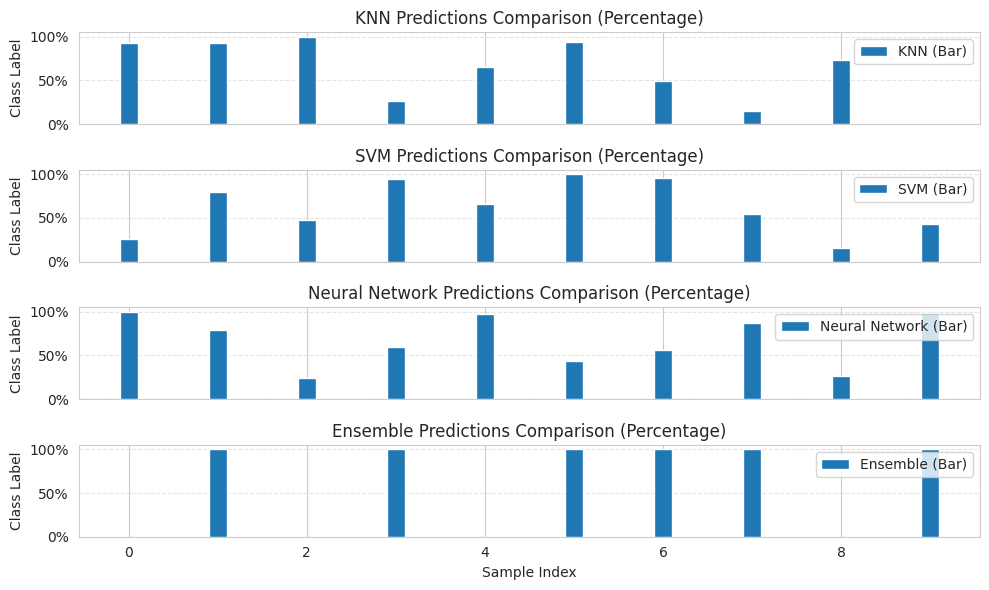

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming ensemble_pred_classes, knn_predictions, svm_predictions, nn_predictions are defined

# Sample data (replace this with your actual data)
ensemble_pred_classes = np.random.randint(0, 2, size=10)
knn_predictions = np.random.rand(10)
svm_predictions = np.random.rand(10)
nn_predictions = np.random.rand(10)

# Normalize data to be in the range [0, 1]
normalized_ensemble_pred = ensemble_pred_classes / max(ensemble_pred_classes)
normalized_knn_predictions = knn_predictions / max(knn_predictions)
normalized_svm_predictions = svm_predictions / max(svm_predictions)
normalized_nn_predictions = nn_predictions / max(nn_predictions)

# Combine all predictions for plotting
all_predictions = [normalized_knn_predictions, normalized_svm_predictions, normalized_nn_predictions, normalized_ensemble_pred]
algorithm_names = ['KNN', 'SVM', 'Neural Network', 'Ensemble']

num_predictions = len(all_predictions)
bar_width = 0.2
bar_positions = np.arange(len(normalized_ensemble_pred))

# Create subplots for each algorithm
fig, axs = plt.subplots(num_predictions, 1, figsize=(10, 6), sharex=True)

for i, (predictions, algorithm) in enumerate(zip(all_predictions, algorithm_names)):
    # Bar graph
    axs[i].bar(bar_positions, predictions, width=bar_width, label=f'{algorithm} (Bar)')



    # Add labels and title
    axs[i].set_ylabel('Class Label')
    axs[i].set_title(f'{algorithm} Predictions Comparison (Percentage)')

    # Add grid lines for better readability
    axs[i].grid(axis='y', linestyle='--', alpha=0.5)

    # Adjust y-axis ticks to represent percentages
    axs[i].set_yticklabels(['{:.0f}%'.format(x*100) for x in axs[i].get_yticks()])

    # Add legend
    axs[i].legend()

# Add labels to the shared x-axis
plt.xlabel('Sample Index')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
